In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [253]:
df = pd.read_csv('/Users/mickelelia/Desktop/AMIT WORKS/Data_Science/10000 Sales Records.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Asia,Laos,Beverages,Online,H,7/15/2014,199342048,7/31/2014,8597,47.45,31.79,407927.65,273298.63,134629.02
9996,Europe,Liechtenstein,Cosmetics,Online,C,10/27/2012,763044106,11/1/2012,562,437.20,263.33,245706.40,147991.46,97714.94
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Vegetables,Offline,M,2/14/2013,848579967,3/20/2013,2524,154.06,90.93,388847.44,229507.32,159340.12
9998,Sub-Saharan Africa,South Africa,Meat,Online,L,2/19/2017,298185956,2/22/2017,8706,421.89,364.69,3672974.34,3174991.14,497983.20


In [254]:
# Summary Statistics
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Order ID,10000.0,5.498719e+08,2.607835e+08,1.000892e+08,3.218067e+08,5.485663e+08,7.759981e+08,9.999342e+08
Units Sold,10000.0,5.002856e+03,2.873246e+03,2.000000e+00,2.530750e+03,4.962000e+03,7.472000e+03,1.000000e+04
Unit Price,10000.0,2.681431e+02,2.179441e+02,9.330000e+00,1.092800e+02,2.057000e+02,4.372000e+02,6.682700e+02
Unit Cost,10000.0,1.888066e+02,1.764459e+02,6.920000e+00,5.667000e+01,1.171100e+02,3.646900e+02,5.249600e+02
Total Revenue,10000.0,1.333355e+06,1.465026e+06,1.679400e+02,2.885511e+05,8.000512e+05,1.819143e+06,6.680027e+06
Total Cost,10000.0,9.382658e+05,1.145914e+06,1.245600e+02,1.647855e+05,4.816058e+05,1.183822e+06,5.241726e+06
Total Profit,10000.0,3.950893e+05,3.775550e+05,4.338000e+01,9.832914e+04,2.890990e+05,5.664227e+05,1.738178e+06


In [255]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Dtypes,object,object,object,object,object,object,int64,object,int64,float64,float64,float64,float64,float64
Num_Uniq,7,185,12,2,4,2691,10000,2719,6307,12,12,9600,9599,9598


In [256]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [257]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [258]:
# make All variable in column start with lowercase.
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [259]:
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')

In [260]:
df.duplicated().sum()

np.int64(0)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   region          10000 non-null  object 
 1   country         10000 non-null  object 
 2   item_type       10000 non-null  object 
 3   sales_channel   10000 non-null  object 
 4   order_priority  10000 non-null  object 
 5   order_date      10000 non-null  object 
 6   order_id        10000 non-null  int64  
 7   ship_date       10000 non-null  object 
 8   units_sold      10000 non-null  int64  
 9   unit_price      10000 non-null  float64
 10  unit_cost       10000 non-null  float64
 11  total_revenue   10000 non-null  float64
 12  total_cost      10000 non-null  float64
 13  total_profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [262]:
df.head()

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [263]:
df_sale_chan = df['sales_channel'].value_counts()

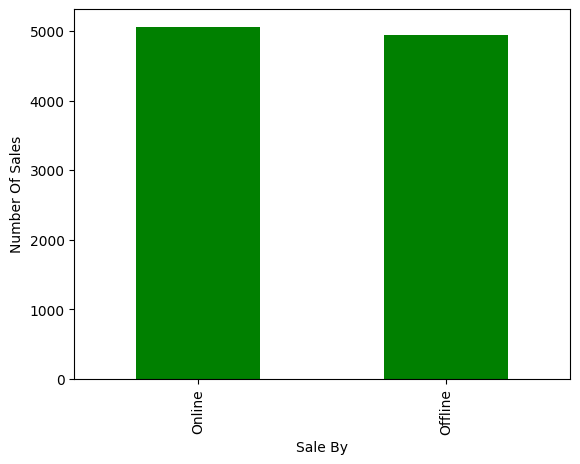

In [264]:
df_sale_chan.plot(kind='bar', color='green')
plt.xlabel('Sale By')
plt.ylabel('Number Of Sales')
plt.show()

In [265]:
df_UnitSold_Prod= df.groupby('item_type')['units_sold'].sum().sort_values(ascending=False).reset_index()
df_UnitSold_Prod

,item_type,units_sold
0,Personal Care,4402827
1,Clothes,4352350
2,Household,4336803
3,Vegetables,4238098
4,Cereal,4203394
5,Baby Food,4197006
6,Snacks,4122781
7,Office Supplies,4120263
8,Cosmetics,4103290
9,Fruits,4055921


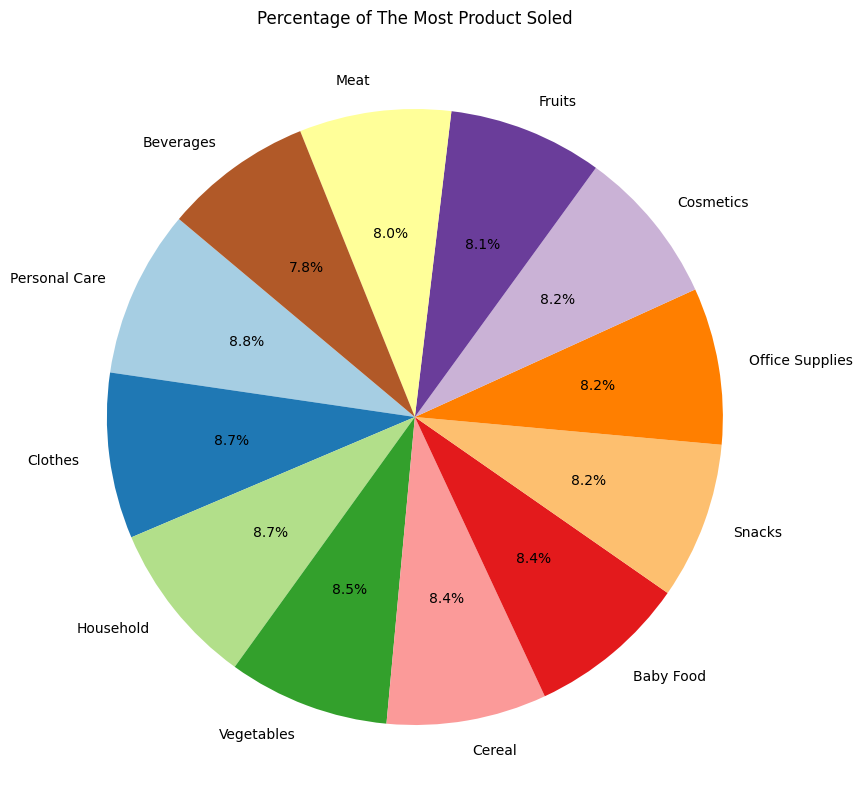

In [266]:
plt.figure(figsize=(14,10))
plt.pie(df_UnitSold_Prod['units_sold'], labels=df_UnitSold_Prod['item_type'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of The Most Product Soled')
plt.show()

In [267]:
df['region'].value_counts() 

region
Europe                               2633
Sub-Saharan Africa                   2603
Asia                                 1469
Middle East and North Africa         1264
Central America and the Caribbean    1019
Australia and Oceania                 797
North America                         215
Name: count, dtype: int64

In [268]:
# Total Money Earned For All Regions 
region_Rev = df.groupby('region')['total_revenue'].sum().sort_values(ascending=False).reset_index()
region_Rev

,region,total_revenue
0,Europe,3.481372e+09
1,Sub-Saharan Africa,3.350556e+09
2,Asia,2.005306e+09
3,Middle East and North Africa,1.715633e+09
4,Central America and the Caribbean,1.395530e+09
5,Australia and Oceania,1.049802e+09
6,North America,3.353524e+08


/var/folders/md/td7wkklx46x3nkwqgd6xkcmr0000gn/T/ipykernel_19886/2400409357.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




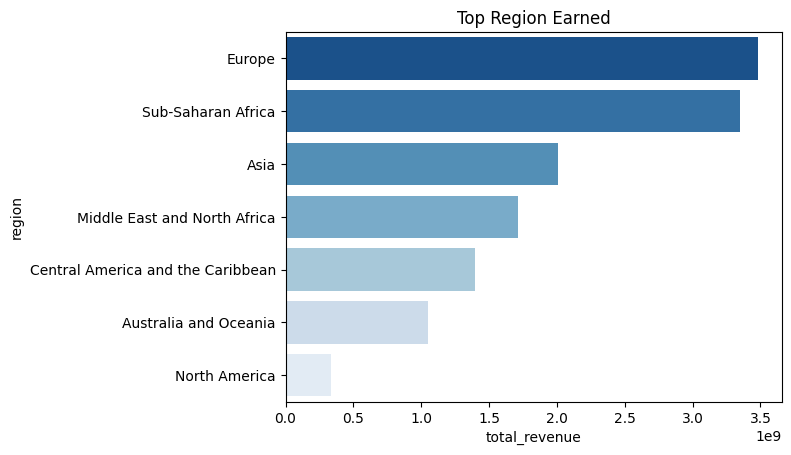

In [269]:
sns.barplot(x='total_revenue', y='region', data=region_Rev, palette='Blues_r')
plt.title('Top Region Earned')
plt.xlabel('total_revenue')
plt.ylabel('region')
plt.show()

In [270]:
# The Most Region Earned Profit Maney.
region_Pfit = df.groupby('region')['total_profit'].sum().sort_values(ascending=False).reset_index()
region_Pfit

,region,total_profit
0,Europe,1.027000e+09
1,Sub-Saharan Africa,9.996421e+08
2,Asia,5.874033e+08
3,Middle East and North Africa,5.099239e+08
4,Central America and the Caribbean,4.033578e+08
5,Australia and Oceania,3.240712e+08
6,North America,9.949552e+07


/var/folders/md/td7wkklx46x3nkwqgd6xkcmr0000gn/T/ipykernel_19886/1141525831.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




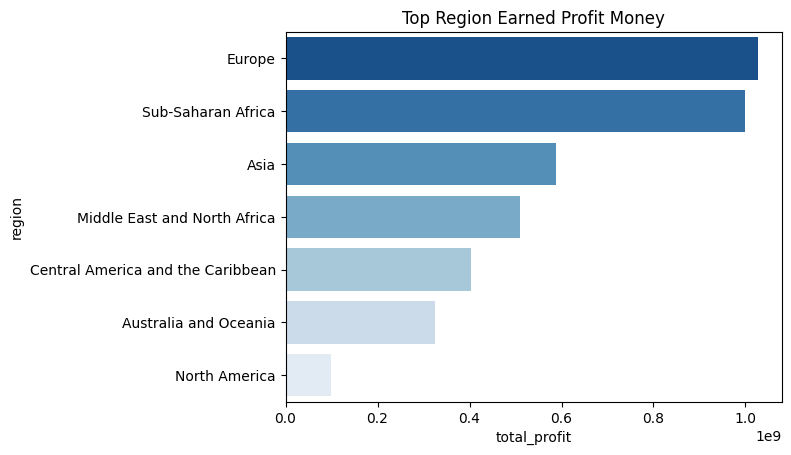

In [271]:
sns.barplot(x='total_profit', y='region', data=region_Pfit, palette='Blues_r')
plt.title('Top Region Earned Profit Money')
plt.xlabel('total_profit')
plt.ylabel('region')
plt.show()

In [272]:
df['item_type'].value_counts()

item_type
Personal Care      888
Household          875
Clothes            872
Baby Food          842
Office Supplies    837
Vegetables         836
Cosmetics          834
Cereal             825
Snacks             816
Meat               798
Fruits             795
Beverages          782
Name: count, dtype: int64

In [273]:
#Total Money Earned From The Sale of Product.
df_type_rev = df.groupby('item_type')['total_revenue'].sum().sort_values(ascending=False).reset_index()
df_type_rev

,item_type,total_revenue
0,Household,2.898155e+09
1,Office Supplies,2.683156e+09
2,Cosmetics,1.793958e+09
3,Meat,1.681396e+09
4,Baby Food,1.071412e+09
5,Cereal,8.646381e+08
6,Vegetables,6.529214e+08
7,Snacks,6.290539e+08
8,Clothes,4.756248e+08
9,Personal Care,3.598431e+08


In [274]:
#Total Profit Money Earned From The Sale of Product.
df_type_pfit = df.groupby('item_type')['total_profit'].sum().sort_values(ascending=False).reset_index()
df_type_pfit

,item_type,total_profit
0,Household,7.187384e+08
1,Cosmetics,7.134390e+08
2,Office Supplies,5.201832e+08
3,Baby Food,4.023250e+08
4,Cereal,3.723787e+08
5,Clothes,3.196366e+08
6,Vegetables,2.675511e+08
7,Meat,2.279643e+08
8,Snacks,2.273301e+08
9,Personal Care,1.103348e+08


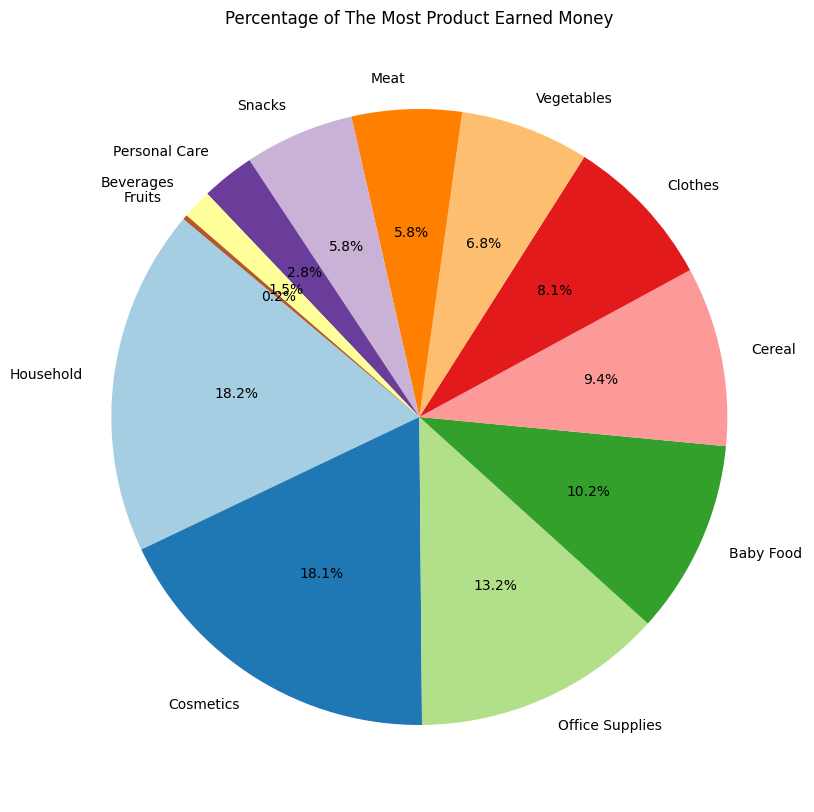

In [275]:
plt.figure(figsize=(14,10))
plt.pie(df_type_pfit['total_profit'], labels=df_type_pfit['item_type'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of The Most Product Earned Money')
plt.show()

In [276]:
df_URL = df[df['region'] == 'Europe']
df_URL

,region,country,item_type,sales_channel,order_priority,order_date,order_id,ship_date,units_sold,unit_price,unit_cost,total_revenue,total_cost,total_profit
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06
11,Europe,Bosnia and Herzegovina,Baby Food,Offline,M,10/20/2012,479823005,11/15/2012,9145,255.28,159.42,2334535.60,1457895.90,876639.70
12,Europe,Germany,Office Supplies,Online,C,2/22/2015,498603188,2/27/2015,6618,651.21,524.96,4309707.78,3474185.28,835522.50
17,Europe,Vatican City,Beverages,Online,L,4/6/2015,206925189,4/27/2015,2617,47.45,31.79,124176.65,83194.43,40982.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Europe,Lithuania,Beverages,Offline,M,8/2/2015,288644158,9/21/2015,5076,47.45,31.79,240856.20,161366.04,79490.16
9978,Europe,Croatia,Personal Care,Online,M,3/28/2012,144039189,5/14/2012,3252,81.73,56.67,265785.96,184290.84,81495.12
9986,Europe,Greece,Vegetables,Offline,H,6/6/2010,694237935,6/26/2010,9287,154.06,90.93,1430755.22,844466.91,586288.31
9991,Europe,Moldova,Snacks,Offline,H,8/10/2010,579082763,9/2/2010,2313,152.58,97.44,352917.54,225378.72,127538.82


In [277]:
# The Most Country Earned Money. 
# Select The First 20 rows (All Columns)
df_URL_rev = df_URL.iloc[0:20, :].groupby('country')['total_revenue'].sum().sort_values(ascending=False).reset_index()
df_URL_rev

,country,total_revenue
0,Germany,4309707.78
1,Bulgaria,4034918.80
2,Russia,2678376.54
3,Bosnia and Herzegovina,2334535.60
4,Ukraine,2178297.45
5,Italy,1868373.10
6,Poland,1575456.30
7,San Marino,1440923.18
8,Greece,707806.56
9,Switzerland,546283.32


In [278]:
# The Most Country Earned Profit Money. 
# Select The First 20 rows (All Columns)
df_URL_rev = df_URL.iloc[0:20, :].groupby('country')['total_profit'].sum().sort_values(ascending=False).reset_index()
df_URL_rev

,country,total_profit
0,Bulgaria,1604646.23
1,Bosnia and Herzegovina,876639.70
2,Germany,835522.50
3,Italy,804662.97
4,Poland,678510.81
5,Russia,607442.54
6,San Marino,590454.89
7,Greece,475670.88
8,Ukraine,422306.25
9,France,186927.00


In [279]:
df_URL_slae=df_URL['sales_channel'].value_counts()
df_URL_slae

sales_channel
Offline    1318
Online     1315
Name: count, dtype: int64

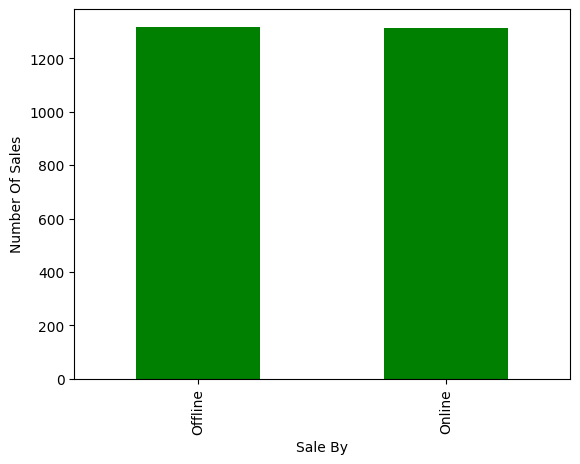

In [280]:
df_URL_slae.plot(kind='bar', color='green')
plt.xlabel('Sale By')
plt.ylabel('Number Of Sales')
plt.show()

In [281]:
URL_Rev = df_URL.iloc[0:20, :].groupby('country')['total_revenue'].sum().sort_values(ascending=False).reset_index()
URL_Rev

,country,total_revenue
0,Germany,4309707.78
1,Bulgaria,4034918.80
2,Russia,2678376.54
3,Bosnia and Herzegovina,2334535.60
4,Ukraine,2178297.45
5,Italy,1868373.10
6,Poland,1575456.30
7,San Marino,1440923.18
8,Greece,707806.56
9,Switzerland,546283.32


In [282]:
URL_pfit = df_URL.iloc[0:20, :].groupby('country')['total_profit'].sum().sort_values(ascending=False).reset_index()
URL_pfit

,country,total_profit
0,Bulgaria,1604646.23
1,Bosnia and Herzegovina,876639.70
2,Germany,835522.50
3,Italy,804662.97
4,Poland,678510.81
5,Russia,607442.54
6,San Marino,590454.89
7,Greece,475670.88
8,Ukraine,422306.25
9,France,186927.00


/var/folders/md/td7wkklx46x3nkwqgd6xkcmr0000gn/T/ipykernel_19886/3444203952.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




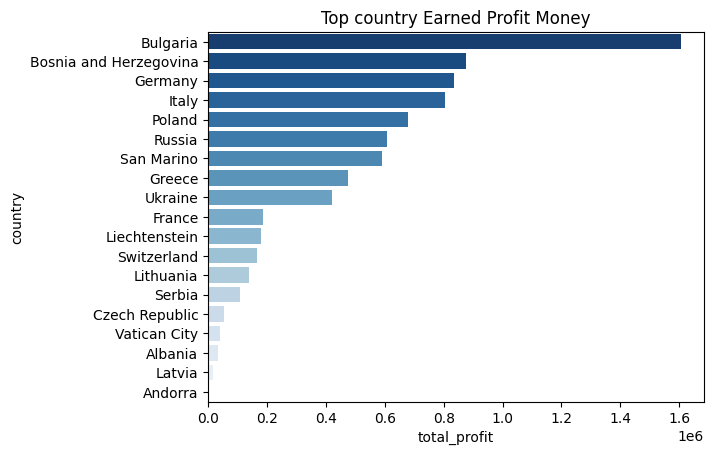

In [283]:
sns.barplot(x='total_profit', y='country', data=URL_pfit, palette='Blues_r')
plt.title('Top country Earned Profit Money')
plt.xlabel('total_profit')
plt.ylabel('country')
plt.show()

In [284]:
df_URL['item_type'].value_counts()

item_type
Personal Care      241
Cosmetics          235
Clothes            234
Office Supplies    231
Cereal             227
Meat               223
Vegetables         223
Household          211
Baby Food          210
Snacks             203
Fruits             199
Beverages          196
Name: count, dtype: int64

In [285]:
URL_item_prfit = df_URL.groupby('item_type')['total_profit'].sum().sort_values(ascending=False).reset_index()
URL_item_prfit

,item_type,total_profit
0,Cosmetics,1.989963e+08
1,Household,1.702985e+08
2,Office Supplies,1.423337e+08
3,Cereal,1.010923e+08
4,Baby Food,9.687343e+07
5,Clothes,8.329389e+07
6,Vegetables,6.698649e+07
7,Meat,6.430287e+07
8,Snacks,5.615441e+07
9,Personal Care,2.940235e+07


/var/folders/md/td7wkklx46x3nkwqgd6xkcmr0000gn/T/ipykernel_19886/3654670355.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




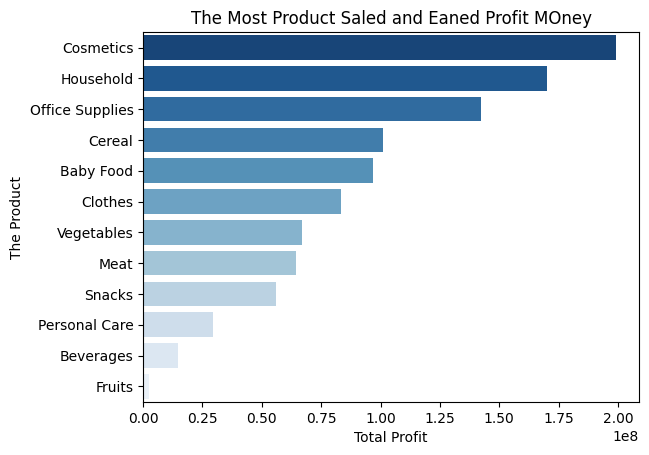

In [286]:
sns.barplot(x='total_profit', y='item_type', data=URL_item_prfit, palette='Blues_r')
plt.title('The Most Product Saled and Eaned Profit MOney')
plt.xlabel('Total Profit')
plt.ylabel('The Product')
plt.show()